# Traffic Sign Recognition —— Model 
---

Course: **CSCI-GA 2271 Computer Vision**

Semester: **Fall 2022**

## Introduction
---

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST (handwritten digits)
- CIFAR-10 (32x32 resolution color images of 10 object classes)


## 1. Warmup [5%]
---

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand. MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. On the other hand, CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

* (a) Display 10 random images from each class of MNIST
* (b) Do the same for each class of CIFAR-10

Use `matplotlib` and ipython notebook's visualization capabilities. See [this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for hints on how to achieve this.

## 2. Training a Single Layer Network on MNIST [10%]
---

* (a) Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model and train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). The loss function ([cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy)) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`. The default values for the learning rate, batch size and number of epochs are given in the `options` cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. Note the decrease in training loss and corresponding decrease in validation errors.

* (b): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

* (c): Reduce the number of training examples to just 50. (Hint: limit the iterator in the `train` function) and train the model until the loss converges. Explain what is happening to the model.

## 3. Training a Multi-Layer Network on MNIST [10%]
---

* (a) Add an extra layer with 1000 hidden units and a `tanh` nonlinearity. (Hint: modify the `Net` class). Train the model for 10 epochs.
* (b) Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations

## 4. Training a Convolutional Network on CIFAR [25%]
---

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- (a) Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

* (b) Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters.

* (c) Give a breakdown of the parameters within the above model, and the overall number.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may speed up training if you use a GPU runtime (`RunTime > Change Runtime Type > GPU`).

In [65]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import random

In [66]:
# Options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

Display 10 random images from class 0


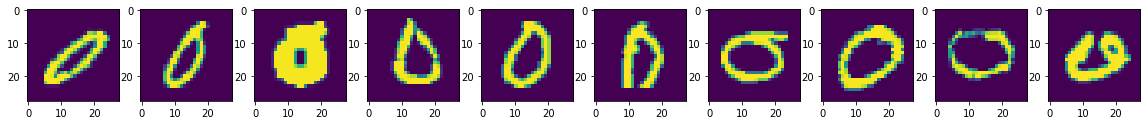

Display 10 random images from class 1


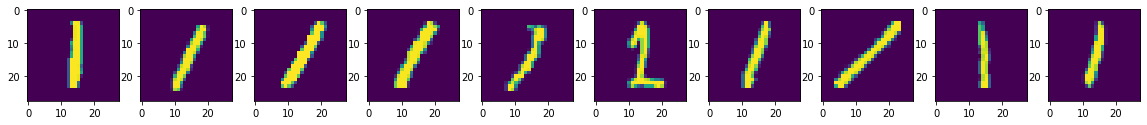

Display 10 random images from class 2


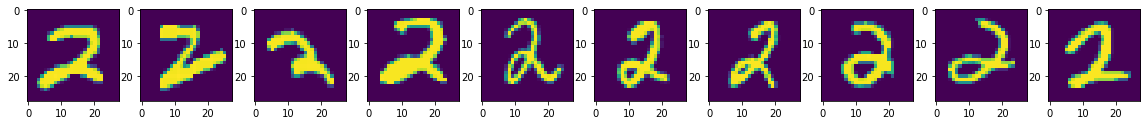

Display 10 random images from class 3


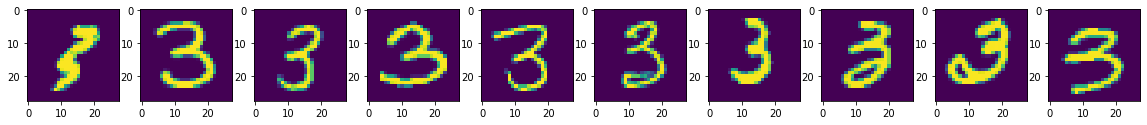

Display 10 random images from class 4


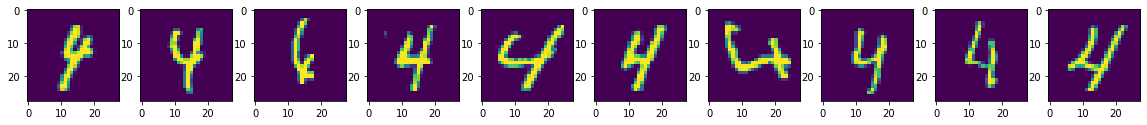

Display 10 random images from class 5


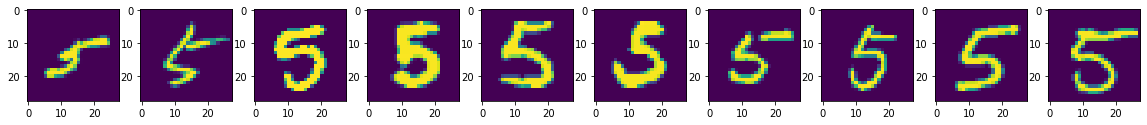

Display 10 random images from class 6


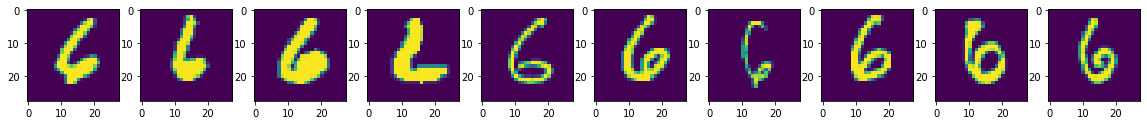

Display 10 random images from class 7


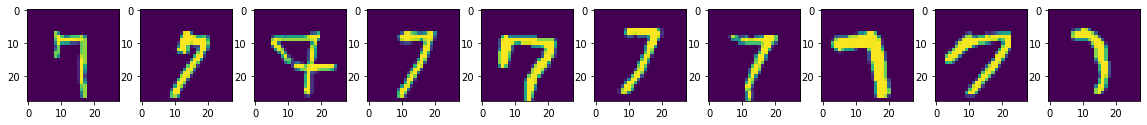

Display 10 random images from class 8


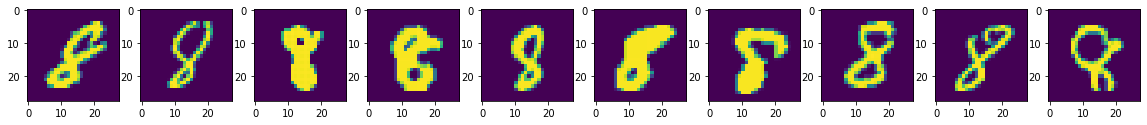

Display 10 random images from class 9


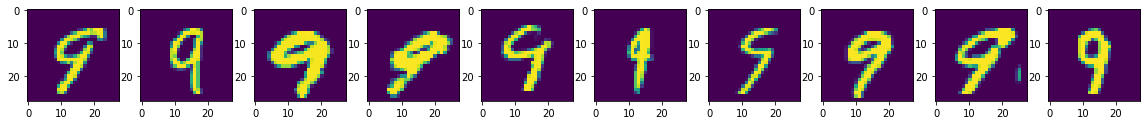

In [67]:
### 1. Warmup

## 1a. MNIST
dataset = 'mnist'
data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

for label in range(10):
  print(f"Display 10 random images from class {str(label)}")
  fig = plt.figure(figsize = (20, 20))
  indices = np.where(np.array(trainset.targets) == label)[0]
  sample_indices = indices[random.sample(range(len(indices)), 10)]
  samples = trainset.data[sample_indices]
  for i in range(10):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(samples[i])
  plt.show()

Files already downloaded and verified
Files already downloaded and verified
Display 10 random images from class 0


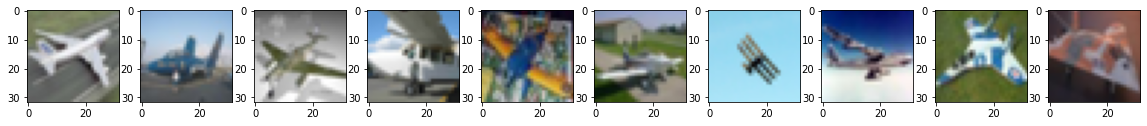

Display 10 random images from class 1


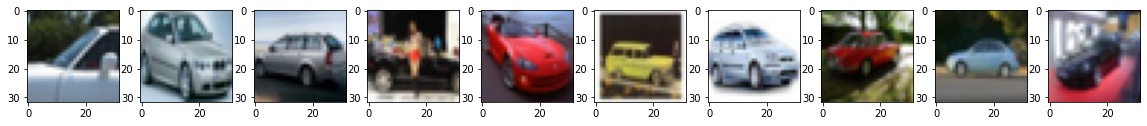

Display 10 random images from class 2


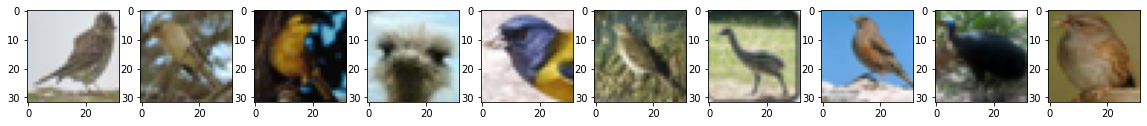

Display 10 random images from class 3


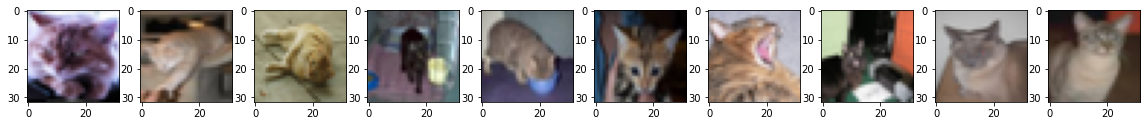

Display 10 random images from class 4


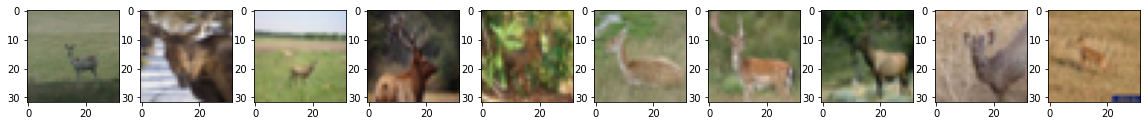

Display 10 random images from class 5


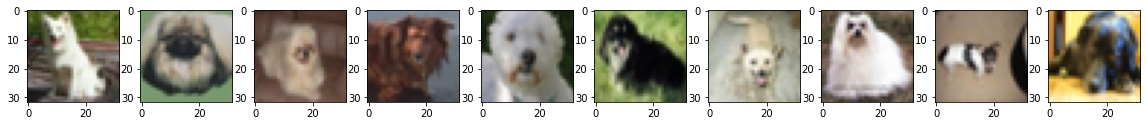

Display 10 random images from class 6


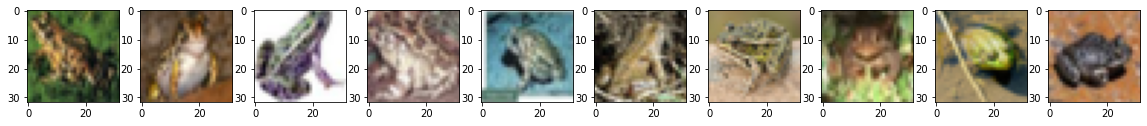

Display 10 random images from class 7


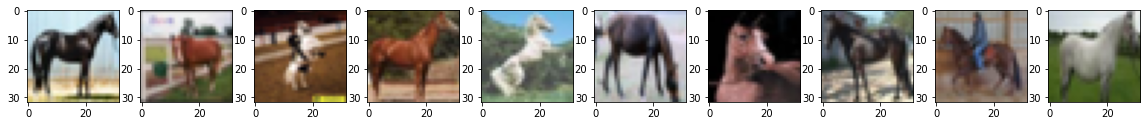

Display 10 random images from class 8


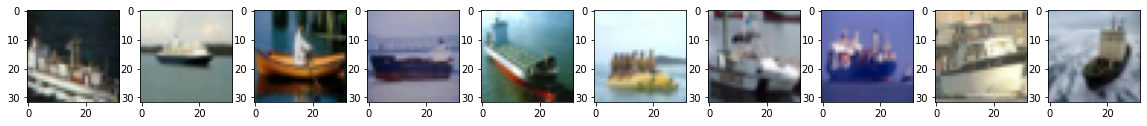

Display 10 random images from class 9


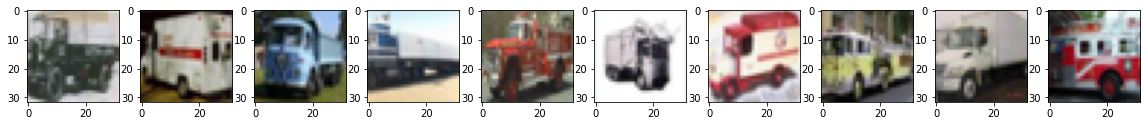

In [68]:
## 1b. CIFAR-10
dataset = 'cifar10'
data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

for label in range(10):
  print(f"Display 10 random images from class {str(label)}")
  fig = plt.figure(figsize = (20, 20))
  indices = np.where(np.array(trainset.targets) == label)[0]
  sample_indices = indices[random.sample(range(len(indices)), 10)]
  samples = trainset.data[sample_indices]
  for i in range(10):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(samples[i])
  plt.show()

In [69]:
### 2. Training a Single Layer Network on MNIST
## 2a. Start by running the training on MNIST

In [70]:
dataset = 'mnist'

In [71]:
# Data Loading
# This cell might take some time when you run it for the first time, 
# because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

In [72]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [73]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [74]:
train(1)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.460411
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.701278
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.588564
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.602286
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.467075
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.218052
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.509180
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.458748
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.263012
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.620653


In [75]:
test()


Test set: Average loss: 0.3339, Accuracy: 9057/10000 (91%)



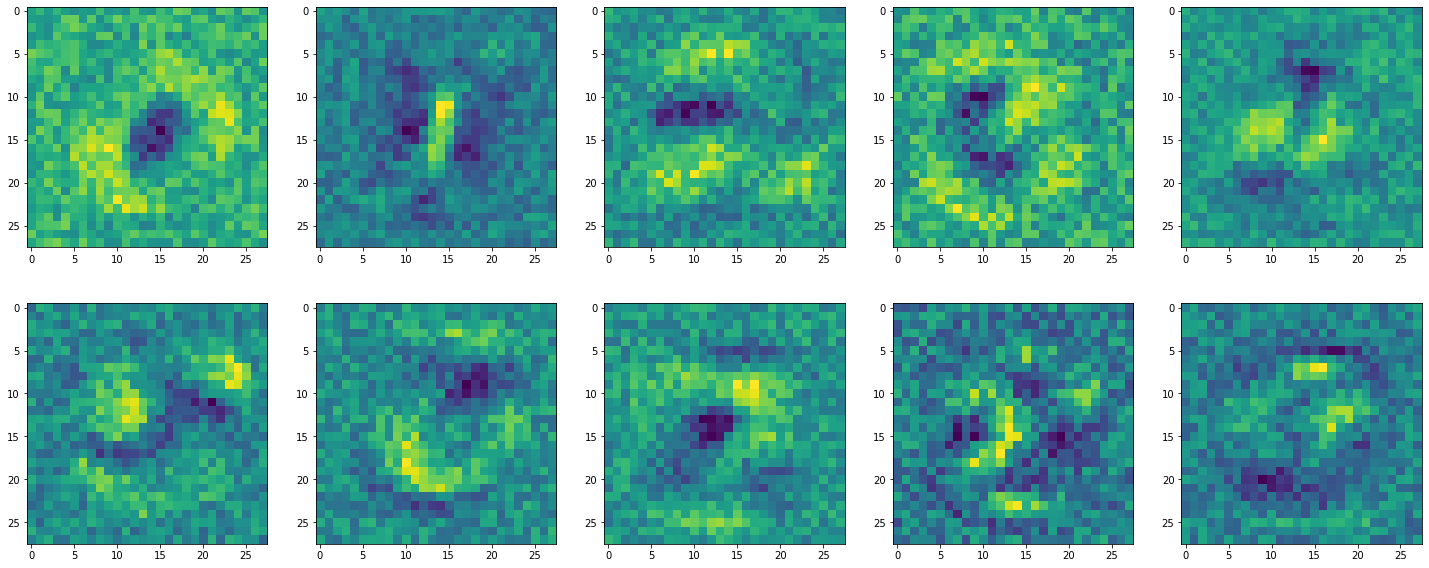

In [76]:
## 2b. Plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch
fig = plt.figure(figsize = (25, 10))
for i in range(10):
    ax1 = fig.add_subplot(2, 5, i+1)
    ax1.imshow(network.linear.weight[i].view(28, 28).detach().numpy())
plt.show()

In [77]:
## 2c. Reduce the number of training examples to just 50
def train_n_epochs(n):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if batch_idx == 1: break
        data = data[0:50,:]
        target = target[0:50]
    
    for epoch in range(n):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if epoch % 50000 == 0:
            print('Train Epoch: {} Loss: {:.6f}'.format(epoch, loss.item()))

train_n_epochs(1000000)
test()

# What is happening to the model: the model slowly fits to the dataset of the 50 images until the loss converges
# Since there's a lot of overfitting, the average loss on the test set is much higher

Train Epoch: 0 Loss: 0.318609
Train Epoch: 50000 Loss: 0.000207
Train Epoch: 100000 Loss: 0.000105
Train Epoch: 150000 Loss: 0.000070
Train Epoch: 200000 Loss: 0.000053
Train Epoch: 250000 Loss: 0.000043
Train Epoch: 300000 Loss: 0.000036
Train Epoch: 350000 Loss: 0.000030
Train Epoch: 400000 Loss: 0.000027
Train Epoch: 450000 Loss: 0.000024
Train Epoch: 500000 Loss: 0.000021
Train Epoch: 550000 Loss: 0.000019
Train Epoch: 600000 Loss: 0.000018
Train Epoch: 650000 Loss: 0.000017
Train Epoch: 700000 Loss: 0.000015
Train Epoch: 750000 Loss: 0.000014
Train Epoch: 800000 Loss: 0.000013
Train Epoch: 850000 Loss: 0.000013
Train Epoch: 900000 Loss: 0.000012
Train Epoch: 950000 Loss: 0.000011

Test set: Average loss: 0.8494, Accuracy: 7984/10000 (80%)



In [78]:
### 3. Training a Multi-Layer Network on MNIST
## 3a. Add an extra layer with 1000 hidden units and a tanh nonlinearity. Train the model for 10 epochs.

num_hidden = 1000
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, input):
        x = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        x = self.linear1(x)
        x = F.tanh(x)
        output = self.linear2(x)
        return output


network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

epochs = 10
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.320232
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.705631
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.475302
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.553276
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.381593
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.537954
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.332127
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.432030
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.409405
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.419955

Test set: Average loss: 0.3227, Accuracy: 9092/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.395948
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.360212
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.301652
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.213651
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.281183
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.264036
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.364691
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.258214
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.416135
T

In [79]:
## 3b. Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations
lr = 10
optimizer = optim.SGD(network.parameters(), lr=lr)

epochs = 10
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

# What happens during training: The loss explodes, and then hang around in a very high level. The test accuracy is low (about 60%).
# A brief explanation: If the learning rate is too high, the gradient descent algorithm easily bypasses the local minimum and overshoots.

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.049338
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1448.276978
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1461.518677
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1055.140869
Train Epoch: 1 [25600/60000 (43%)]	Loss: 864.393738
Train Epoch: 1 [32000/60000 (53%)]	Loss: 409.902618
Train Epoch: 1 [38400/60000 (64%)]	Loss: 443.715576
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1043.014893
Train Epoch: 1 [51200/60000 (85%)]	Loss: 406.744598
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1157.774536

Test set: Average loss: 360.5832, Accuracy: 4941/10000 (49%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 371.724762
Train Epoch: 2 [6400/60000 (11%)]	Loss: 654.774231
Train Epoch: 2 [12800/60000 (21%)]	Loss: 827.352539
Train Epoch: 2 [19200/60000 (32%)]	Loss: 351.337524
Train Epoch: 2 [25600/60000 (43%)]	Loss: 263.242554
Train Epoch: 2 [32000/60000 (53%)]	Loss: 640.376038
Train Epoch: 2 [38400/60000 (64%)]	Loss: 484.089996
Train Epoch: 2 [44800/60000 (75%)]	Loss: 572.731995
Train Epoc

In [80]:
### 4. Training a Convolutional Network on CIFAR
## 4a. Create a convolutional network with the following architecture
dataset = 'cifar10'
batch_size = 64
data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)
    
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072
num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

lr = 0.01

class CNN(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=(5, 5), padding=2)
        self.conv2 = nn.Conv2d(16, 128, kernel_size=(5, 5), padding=2)
        self.maxpool = nn.MaxPool2d(kernel_size=(2, 2), stride = 2)
        self.linear1 = nn.Linear(64*128, 64)
        self.linear2 = nn.Linear(64, num_outputs)

    def forward(self, input):
        x = F.tanh(self.conv1(input))     # Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity
        x = self.maxpool(x)             # 2 by 2 max pooling (non-overlapping)
        x = F.tanh(self.conv2(x))       # Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity     
        x = self.maxpool(x)             # 2 by 2 max pooling (non-overlapping)
        x = x.view(-1, 64*128)          # Flatten to vector
        x = F.tanh(self.linear1(x))      # Linear layer with 64 hidden units + Tanh nonlinearity.
        output = self.linear2(x)         # Linear layer to 10 output units.
        return output

Files already downloaded and verified
Files already downloaded and verified


In [81]:
## 4b. Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters
network = CNN(num_inputs, num_outputs).cuda()
optimizer = optim.SGD(network.parameters(), lr=lr)

def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data = data.cuda()
        target = target.cuda()
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
epochs = 20
for epoch in range(1, epochs + 1):
  train(epoch)
  test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.316705
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.138021
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.881668
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.957084
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.780829
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.765532
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.707909
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.598277

Test set: Average loss: 1.6694, Accuracy: 4133/10000 (41%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.575051
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.415915
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.538194
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.692173
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.553617
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.430378
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.540455
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.418867

Test set: Average loss: 1.4922, Accuracy: 4732/10000 (47%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.533441
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.535

torch.Size([16, 3, 5, 5])


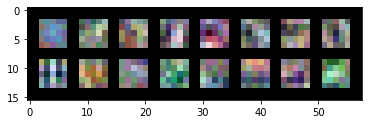

In [83]:
network = network.cpu()
filter = network.conv1.weight.data
print(filter.shape)
image = torchvision.utils.make_grid(filter, normalize = True)
plt.imshow(np.transpose(image, (1, 2, 0)))

In [85]:
## 4c. Give a breakdown of the parameters within the above model, and the overall number
from torchsummary import summary
network = CNN(num_inputs, num_outputs).cuda()
summary(network, input_size=(3,32,32))

# Doing it manually
count = 0
for name, params in network.named_parameters():
  if params.requires_grad:
    num = 1
    for i in params.data.shape:
      num *= i
    count += num
    print(name, params.data.shape)
print(f"The overall number of parameters is {str(count)}.")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]           1,216
         MaxPool2d-2           [-1, 16, 16, 16]               0
            Conv2d-3          [-1, 128, 16, 16]          51,328
         MaxPool2d-4            [-1, 128, 8, 8]               0
            Linear-5                   [-1, 64]         524,352
            Linear-6                   [-1, 10]             650
Total params: 577,546
Trainable params: 577,546
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.47
Params size (MB): 2.20
Estimated Total Size (MB): 2.68
----------------------------------------------------------------
conv1.weight torch.Size([16, 3, 5, 5])
conv1.bias torch.Size([16])
conv2.weight torch.Size([128, 16, 5, 5])
conv2.bias torch.Size([128])
linear1.weight torch.Size([64, 81

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
